In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_telco_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


## What part of our service frustrates customers the most?

### Churn by Contract type

In [2]:
# Analyze churn by Contract type
# Goal: Identify which contract type has highest churn 

# Count number of customers in each contract type who churned vs stayed
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [3]:
# calculate percentage churn per contract type
contract_churn_percent = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100
contract_churn_percent.round(1)

Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


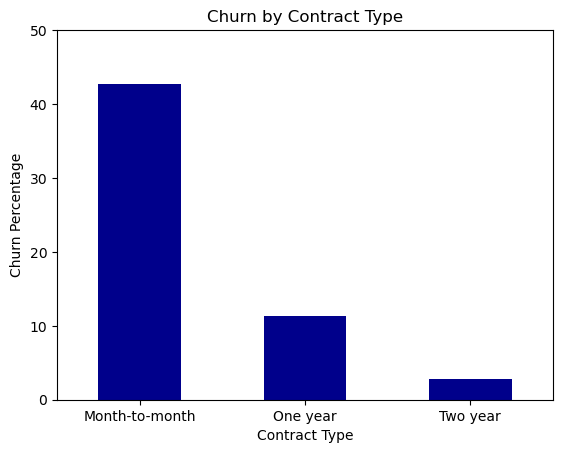

In [4]:
# Visualizing churn percentage by Contract

contract_churn_percent['Yes'].plot(
    kind='bar',
    color= 'darkblue',
    title='Churn by Contract Type',
    ylabel='Churn Percentage',
    xlabel='Contract Type',
    rot=0
)
plt.ylim(0, 50)  # Set Y-axis for percentage
plt.show()

In [5]:
# Analyze churn by Internet Service type

# Count number of customers who churned vs stayed per InternetService type
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_churn

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [6]:
# calculate percentage churn per service type
internet_churn_percent = internet_churn.div(internet_churn.sum(axis=1), axis=0) * 100
internet_churn_percent.round(1)

Churn,No,Yes
InternetService,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


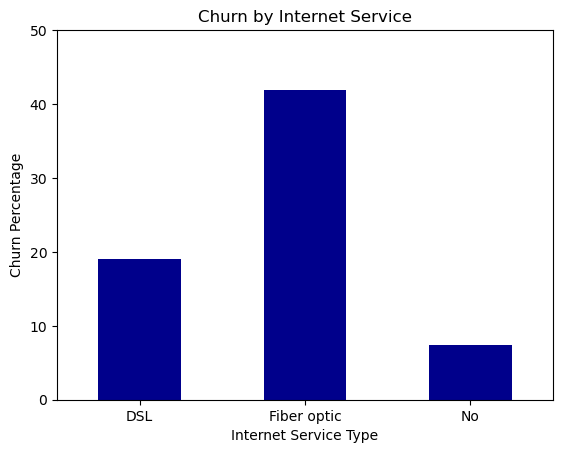

In [10]:
# Visualize churn percentage by Internet Service
internet_churn_percent['Yes'].plot(
    kind='bar',
    color= 'darkblue',
    title='Churn by Internet Service',
    ylabel='Churn Percentage',
    xlabel='Internet Service Type',
    rot=0
)
plt.ylim(0, 50)  
plt.show()


In [ ]:
# Analyze churn by Tech Support 

# Count number of customers who churned vs stayed per TechSupport type
tech_churn = df.groupby(['TechSupport', 'Churn']).size().unstack()
tech_churn

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


In [ ]:
# Calculate percentage churn per TechSupport type
tech_churn_percent = tech_churn.div(tech_churn.sum(axis=1), axis=0) * 100
tech_churn_percent.round(1)

Churn,No,Yes
TechSupport,,
No,58.4,41.6
No internet service,92.6,7.4
Yes,84.8,15.2


### Insight:

Fiber Optic customers show the highest churn rate, suggesting possible service quality or reliability issues. Improving Fiber service performance or support could significantly reduce churn.